# **ONLINE SHOPPER'S INTENTION ANALYSIS**



**BY COURAGE SIAMEH.**

**INTRODUCTION**

Online shopping by consumers is increasing every year, but the conversion rates have stayed relatively stable. For instance, many of us explore e-commerce platforms like Amazon, may add things to our wishlists or shopping carts, but ultimately make no purchases. This reality highlights the necessity for tools and strategies that can tailor promotions and ads to online shoppers and enhance conversion rates. This project will explore multiple factors that influence a buyer's decision.

**DATASET**

We will be utilizing information from the Online Shoppers Purchasing Intention Dataset for this project, which is accessible through the UCI repository. The primary dataset can be located at this link: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset.


**PROJECT MOTIVATION**

The motivation behind this project is to address the issue of low conversion rates in e-commerce websites despite the increasing trend of online shopping. The project aims to use data from the Online Shoppers Purchasing Intention Dataset to analyze various factors that influence a purchaser's decision and explore solutions to improve conversion rates. By customizing promotions and advertisements for online shoppers based on their behavior, preferences, and characteristics, the project aims to improve the overall shopping experience and increase sales for e-commerce websites.


***Importing various Python Libraries***

In [109]:
#importing all packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


***Importing The Dataset***

In [110]:
#importing the dataset into the dataframe df 
df = pd.read_csv('online_shoppers_intention.csv')

***Data Assessment and Wrangling***

In [111]:
#assessing the first 14 rows of our dataset
df.head(14)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [112]:
# Getting information about features in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [113]:
# checking for null values here
df.isnull().sum() 

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

So it appears we have no null values in our dataframe, so we continue with our analysis.

# Exploratory Data Analysis
This very part of the project will take a majority of out time as it is the inception of investigating the data to find hidden outliers and patterns. We go further by plotting them into a visualization.
The analysis techniques employed in the EDA takes three parts following as;
* Univariate Analysis
    
* Bivariate Analysis

* Linear Relationship

In neach phase of these techniques, various corresponding columns would be explored since not all the columns features can be explored by all three analysis techniques.



  

## Univariate Analysis
Each feature or column of the dataframe is analyzed here to uncover the distribution or pattern of data. We begin analysing each of the following features in detail;
* Revenue
* Visitor type
* Traffic type
* Region
* Weekend-wise distribution
* Browser and Operating system
* Special day

We begin analysing each of the features above in detail to gain more insight on what we're at.

In [114]:
# looking at the summary statistics of the data
df.describe().style.background_gradient(cmap = 'winter_r')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### Baseline Conversion (Rate From The [Revenue] Column)
Here, we're looking at the number of online shopping sessions that ended in a purchase(s). The conversion rate is then calculated.

In [115]:
#dtype of the Revenue feature
df.Revenue.dtype

dtype('bool')

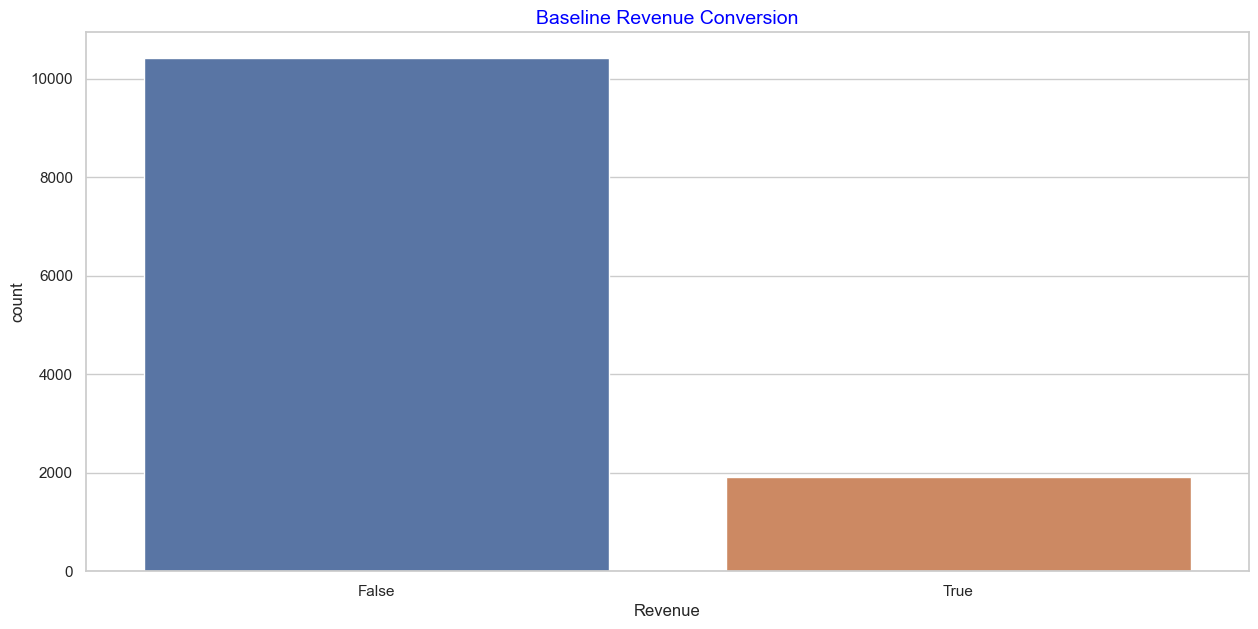

In [116]:
# visualizing a countplot of the revenue column
sns.countplot(data = df, x = 'Revenue')
plt.title("Baseline Revenue Conversion",fontsize = 14, color = 'blue')
plt.show()

The preceeding countplot shows **False** having a higher count compared to **True**.                                
Remember the [Revenue] column is of a boolean dtype.

In [117]:
# the value counts of each subcategory in our feature, the exact values needed for calculating the conversion rate
print(df['Revenue'].value_counts())
print()
print(df['Revenue'].value_counts(normalize = True))

False    10422
True      1908
Name: Revenue, dtype: int64

False    0.845255
True     0.154745
Name: Revenue, dtype: float64


From the preceding data, a total of 1908 ended up making a purchase, while 10422 did not make any.
The conversion rate of online visitors versus overall visitors is the ratio between the total number of online sessions that led to a purchase divided by the total number of sessions. This is calculated as:

In [118]:
1908 / 12330 * 100

15.474452554744525

With 12,330 depicting the overall number of visitors, the conversion rate calculated was 15.47%

### Visitor - Wise Distribution
We further our analysis by looking at the distribution of visitors to the website, to determine the visitor type that is most frequent. It is determined whether they are new visitors, returning visitors or visitors of any other category.

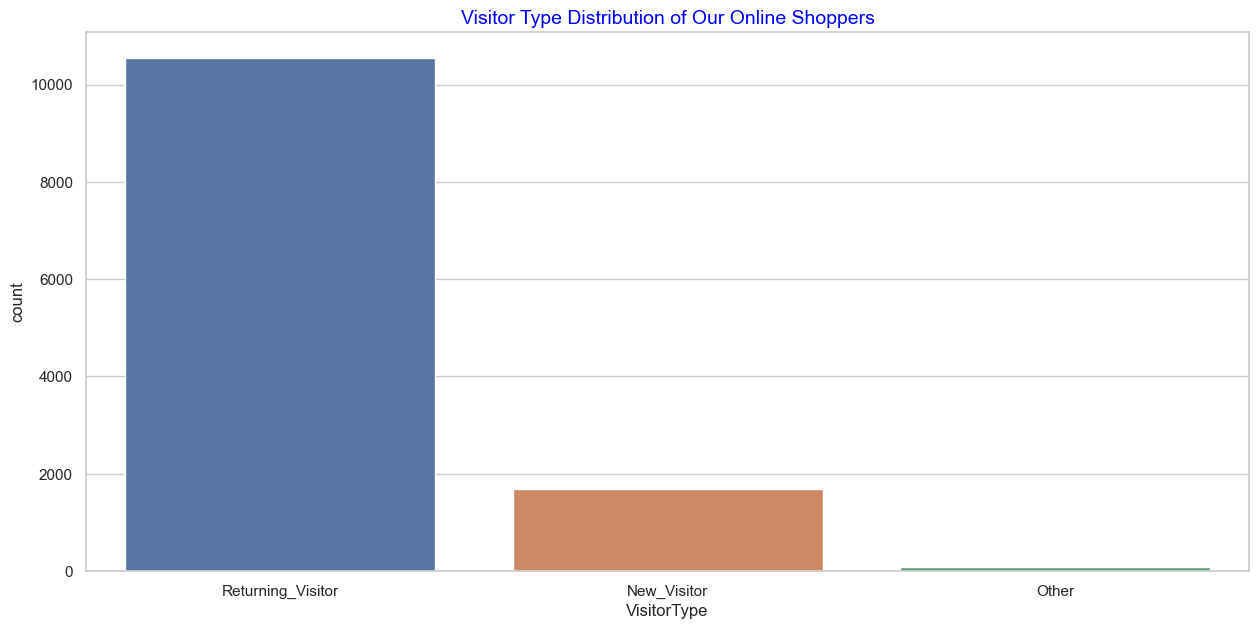

In [119]:
# visualizing a countplot of the VisitorType column
sns.countplot(data = df, x = 'VisitorType')
plt.title("Visitor Type Distribution of Our Online Shoppers",fontsize = 14, color = 'blue')
plt.show()

In [120]:
#looking at the value counts of each visitor type 
print(df['VisitorType'].value_counts())
print()

"""Setting the normalize parameter to True normalizes the counts to proportions or percentages, 
such that the output shows the relative frequency of each unique value as a percentage of the total number of observations 
in the VisitorType column."""

print(df['VisitorType'].value_counts(normalize = True))

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

Returning_Visitor    0.855718
New_Visitor          0.137388
Other                0.006894
Name: VisitorType, dtype: float64


The preceding data shows a higher number of returning visitors compared to that of new visitors. It is quite safe to assume 
there's much success in attracting customers back to the website as shown in the countplot too.

### Traffic-Wise Distribution
Considering this feature, we want to find out just how the visitors visit our webpage to help
1. Determine the amount of site trafffic accounted for by direct visitors
2. how much is generated through other mediums, such as blogs, advertisements, to mention a few.

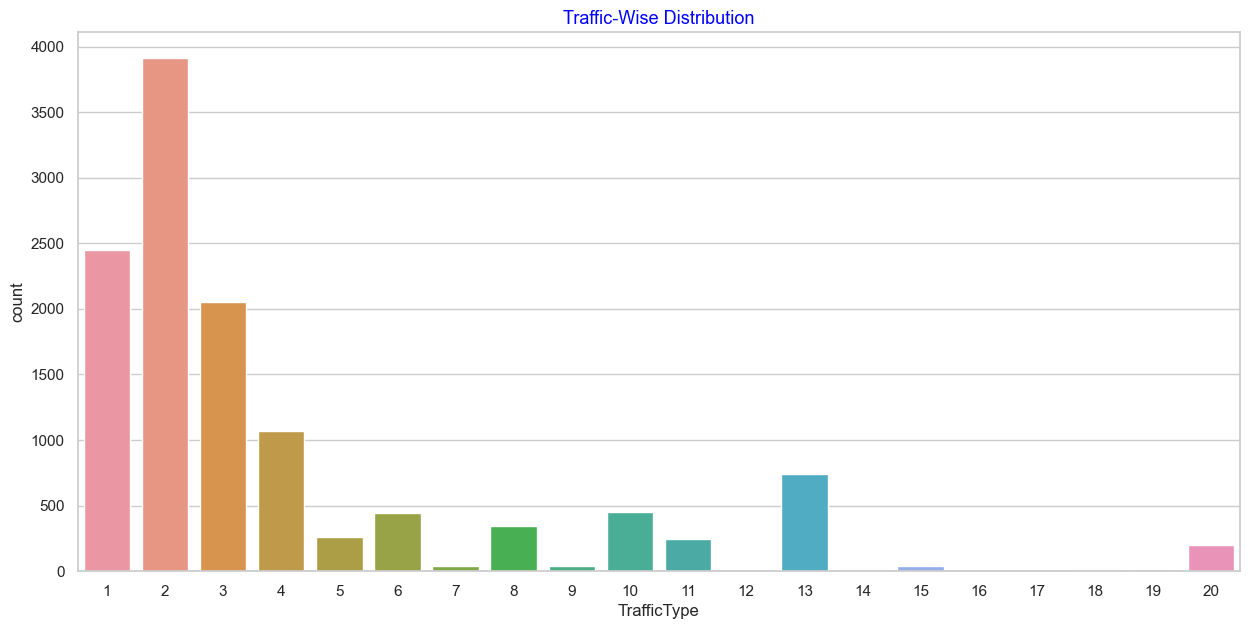

In [121]:
# visualizing a countplot of the TrafficType column
sns.countplot(data = df, x = 'TrafficType')
plt.title("Traffic-Wise Distribution",fontsize = 13, color = 'blue')
plt.show()

Type 2 appers to have the highest count amongst all the types.

In [122]:
"""the line of code below counts the number of occurrences of each unique value in the 'TrafficType' column. 
The normalize parameter is set to True which returns the relative frequencies of each unique value instead
of the absolute counts"""

df.TrafficType.value_counts(normalize = True)

2     0.317356
1     0.198783
3     0.166423
4     0.086699
13    0.059854
10    0.036496
6     0.036010
8     0.027818
5     0.021087
11    0.020032
20    0.016058
9     0.003406
7     0.003244
15    0.003082
19    0.001379
14    0.001054
18    0.000811
16    0.000243
12    0.000081
17    0.000081
Name: TrafficType, dtype: float64

The preceding result is evident enough that sources 2,1,3 and 4 respectively accounted for majority of our web traffic.

### Analysing The Distribution Of Customers Session Online
This part of our analysis takes the distribution of customers over the days of the week to determine whether customers are more 
or less active during the weekdays or weekens. 

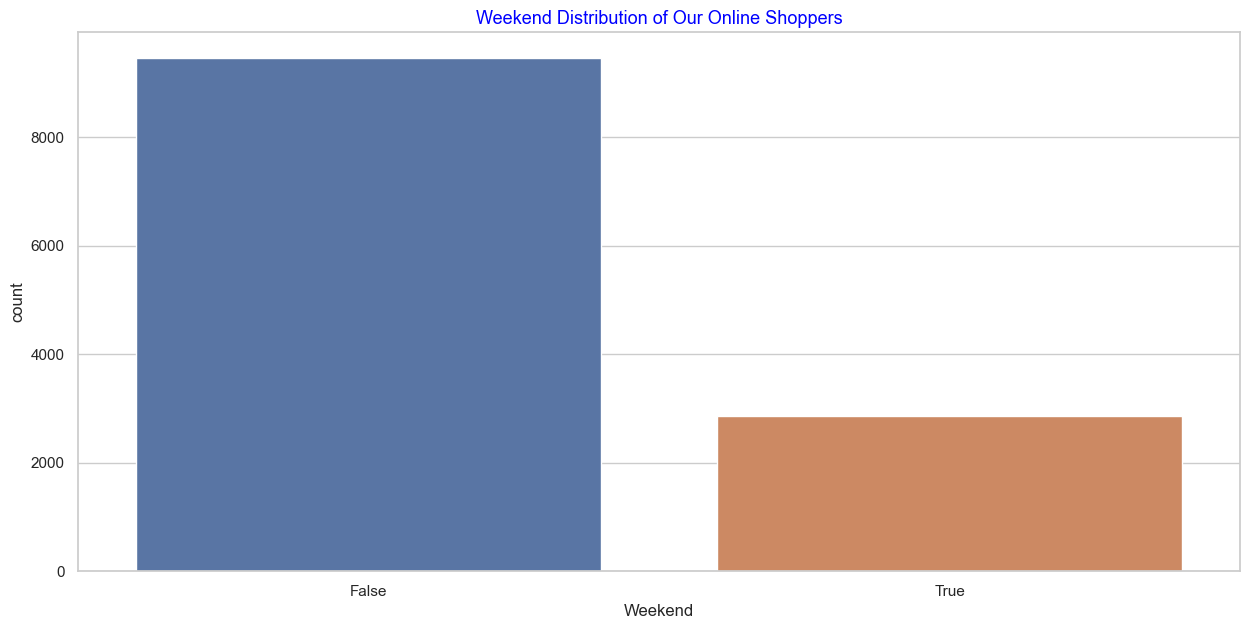

In [123]:
# visualizing a countplot of the Weekend column
sns.countplot(data = df, x = 'Weekend')
plt.title("Weekend Distribution of Our Online Shoppers",fontsize = 13, color = 'blue')
plt.show()

Looks like we've got more customers active on the weekdays compared to the weekends.

In [124]:
# the value counts of each subcategory in our feature
print(df['Weekend'].value_counts())
print()
print(df['Weekend'].value_counts(normalize = True))

False    9462
True     2868
Name: Weekend, dtype: int64

False    0.767397
True     0.232603
Name: Weekend, dtype: float64


The data shows that out of the 12330 online visits by customers to the website,

    9462 active customers visit the website on Weekdays     
    2868 active customers visit the website on Weekends     
More visitors visit the website during weekdays than weekends

### Region - Wise Distribution 
Region - Wise Distribution analysis is to find out which region has the highest number of visitors to out shopping website.


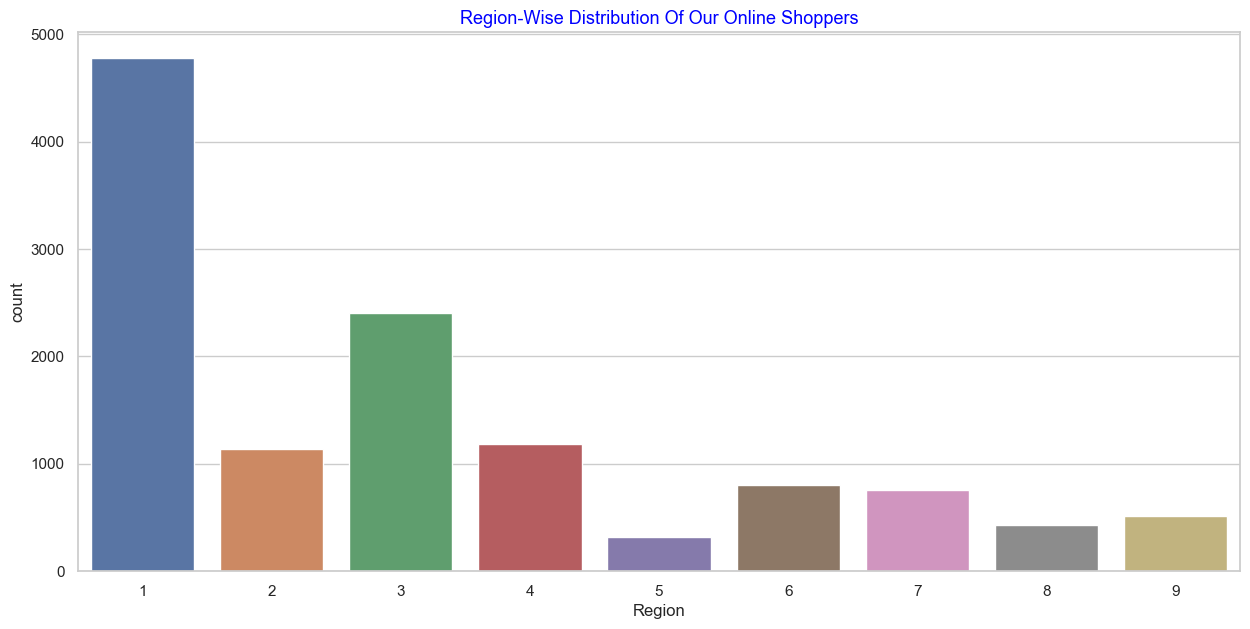

In [125]:
# visualizing a countplot of the Region column
sns.countplot(data = df, x = 'Region')
plt.title("Region-Wise Distribution Of Our Online Shoppers",fontsize = 13, color = 'blue')
plt.show()

Our source data had numbers represennting the different diverse regions our customers are access our website from.
From the graph above, Region 1 is seen to have the highest numbers of customer visits to our website, that of Region 3 and 4 are pretty high too. 

In [126]:
# the value counts of each subcategory in our feature
print(df['Region'].value_counts())
print()
print(df['Region'].value_counts(normalize = True))

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

1    0.387672
3    0.194891
4    0.095864
2    0.092133
6    0.065288
7    0.061719
9    0.041444
8    0.035199
5    0.025791
Name: Region, dtype: float64


Our most potential customers in Region 1 and 3 collectively accounted for 50% of customer online sessions. These two regions are likely going to be the best targets for our marketing camppaigns.

### Analysing The Browser And Operating Systems Of Customers
The aim of this analysis is to aid in configuring our website to make it more responsive, reliable and user-friendly across multiple browser softwares and Operating Systems for our dear customers.

### The Browser Type

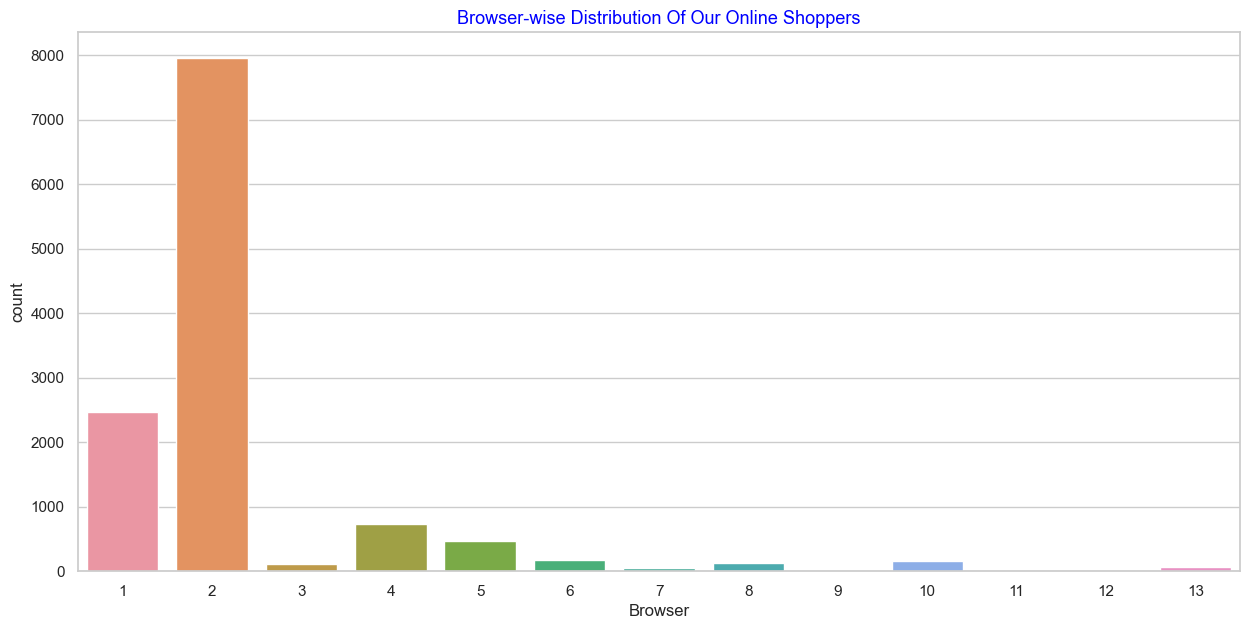

In [127]:
# visualizing a countplot of the Browser column
sns.countplot(data = df, x = 'Browser')
plt.title("Browser-wise Distribution Of Our Online Shoppers",fontsize = 13, color = 'blue')
plt.show()

The browser type 2, emerges with the highest count of users thereby contributing the most to web trraffic on our site. 

In [128]:
# the value counts of each subcategory in our feature
print(df['Browser'].value_counts())
print()
print(df['Browser'].value_counts(normalize = True))

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

2     0.645661
1     0.199676
4     0.059692
5     0.037875
6     0.014112
10    0.013220
8     0.010949
3     0.008516
13    0.004947
7     0.003974
12    0.000811
11    0.000487
9     0.000081
Name: Browser, dtype: float64


### The Operating System Type of Customers

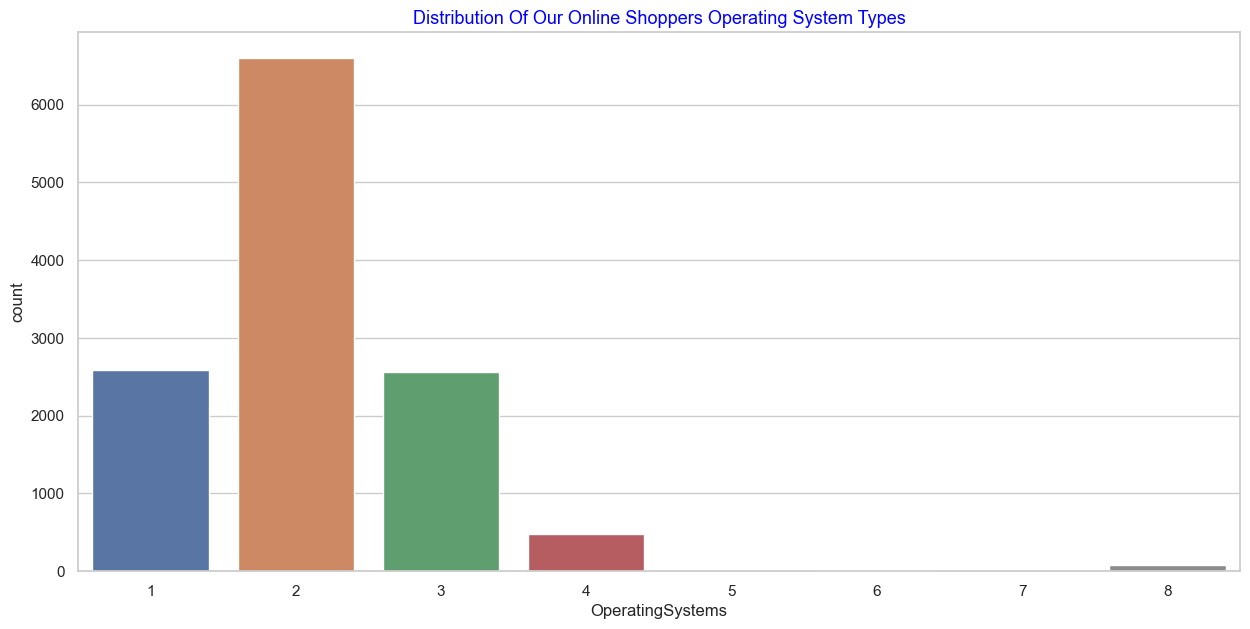

In [129]:
# visualizing a countplot of the Browser column
sns.countplot(data = df, x = 'OperatingSystems')
plt.title("Distribution Of Our Online Shoppers Operating System Types",fontsize = 13, color='blue')
plt.show()

The Operating Sysytem tpe 2 has the highest count, thus contributing the most to website traffic.

In [130]:
# the value counts of each subcategory in our feature
print(df['OperatingSystems'].value_counts())
print()
print(df['OperatingSystems'].value_counts(normalize = True))

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

2    0.535361
1    0.209651
3    0.207218
4    0.038767
8    0.006407
6    0.001541
7    0.000568
5    0.000487
Name: OperatingSystems, dtype: float64


Fron the precedinng information, the OperatingSystem types, 2, 1, and 3 respectively, contribute most to website traffic.

### Distribution Of Customer Website Visits On Special Days 
This session analysis the number of visitors we have on our website during special days. 
We would like to know whether special days like National/public holidays, Valentines days, Festive seasons, affects the number of customers that visit our website. 

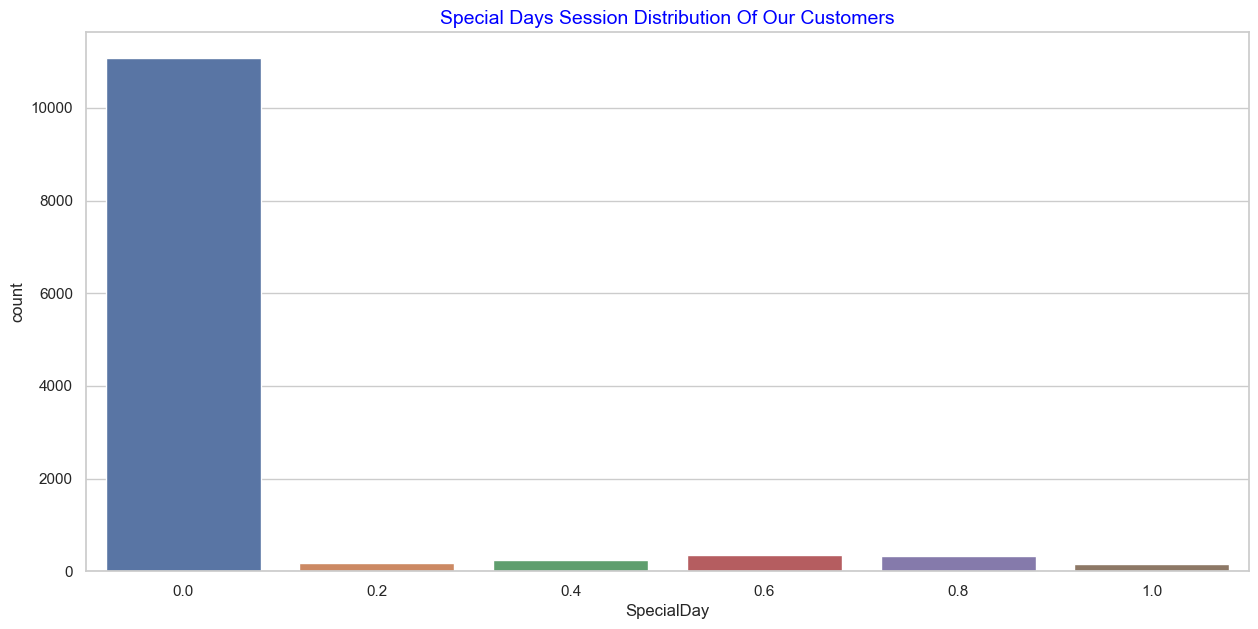

In [131]:
# visualizing a countplot of the SpecialDay column
sns.countplot(data = df, x = 'SpecialDay')
plt.title("Special Days Session Distribution Of Our Customers",fontsize = 14, color = 'blue')
plt.show()

Special days clearly have no efffect or impact on the number of customer turnouts on our website.

In [132]:
# percentage distribution for special days 
print(df['SpecialDay'].value_counts(normalize = True))

0.0    0.898540
0.6    0.028467
0.8    0.026358
0.4    0.019708
0.2    0.014436
1.0    0.012490
Name: SpecialDay, dtype: float64


### BIVARIATE ANALYSIS
We perform this analysis between two variables to look at their relationship. in this session er going to perform bivariate analysis between the revenue column and the following features.
* Visitor type 
* Region
* Month
* Traffic type

### Analysing Revenue Versus TrafficType
We visualizing the rrelationship between revenue and traffic type on a countplot to give us the number of users in each traffic type and whether or not they made a purchase.

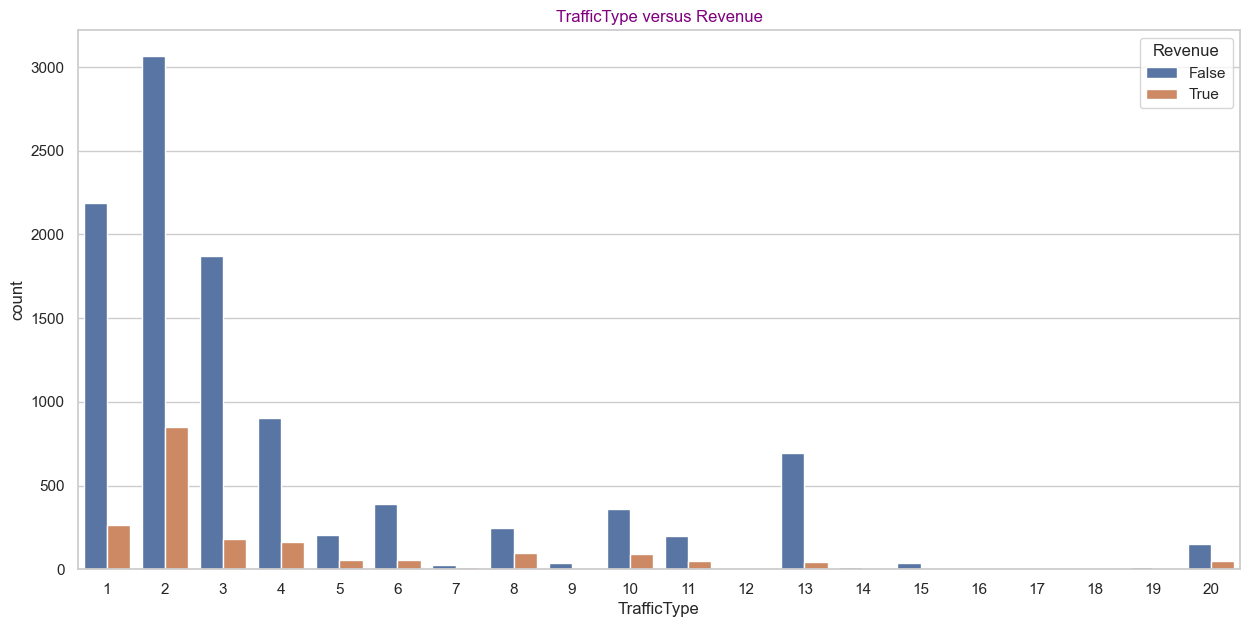

In [133]:
# plotting Revenue and TrafficType
sns.countplot(x = "TrafficType", hue = "Revenue", data = df)
#plt.legend(loc = 'right')
plt.title('TrafficType versus Revenue', color = 'purple')
plt.show()

From the plot, source 2, 1 and 3 respectively has more revenue conversion generated from web traffic. There are other sources with with considerate amount of web traffic and a very low revenue conversion compared to others.

### Analysing Revenue Versus VisitorType
The categorical plot between Revenue and VisitorType will give us te number of customers in each subcategory, and whether or nnot they made a purchase. The values of the revenue column is of boolean dtype, the plot will define customers who make a purchase as **True**, and those who did not as **False**

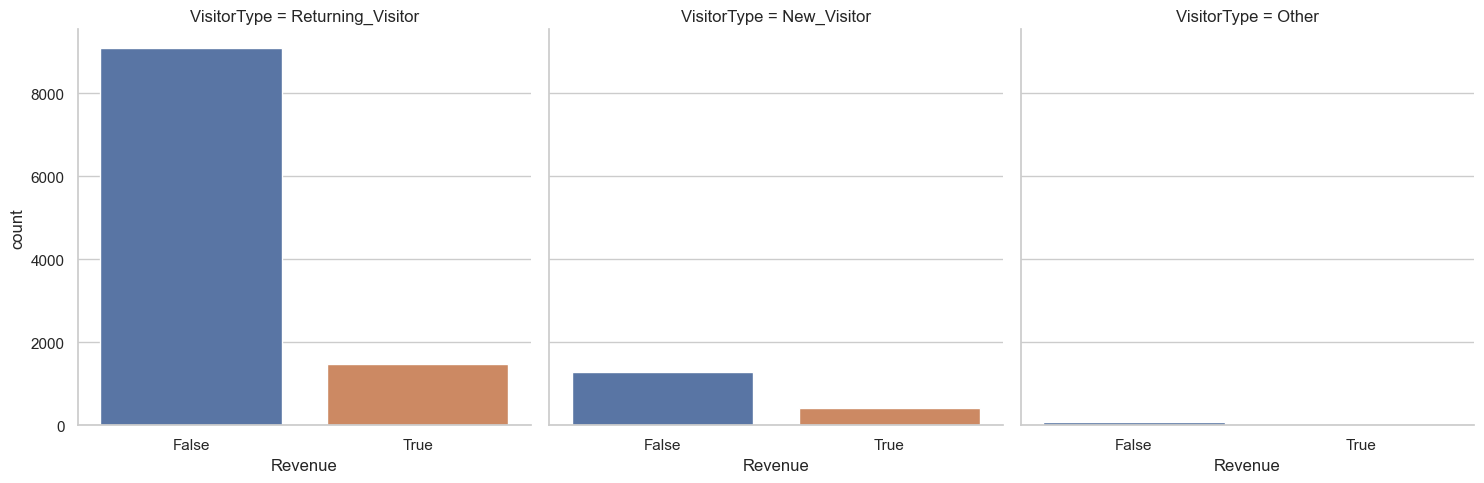

In [134]:
#categorical plot between Revenue and VisitorType
ax = sns.catplot(x="Revenue", col="VisitorType", col_wrap=3, kind="count", height=5, aspect=1, data=df)
plt.show()

The results from the categorical plot reveals there's more revenue conversions for returning customers as compared to new customers. With this info, we can direct our focuses more to increasing new customers engagements with our website to increase overall purchases, revenue generation and customers as a whole.

### Analysing Revenue Versus Month
The categorical plot between Revenue and Month will show us the number of customers in each subcategory, and whether or nnot they made a purchase at a given month. The values of the revenue column is of boolean dtype, the plot will define customers who make a purchase in a specific month as **True**, and those who did not as **False**.

In [135]:
df.Month.value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

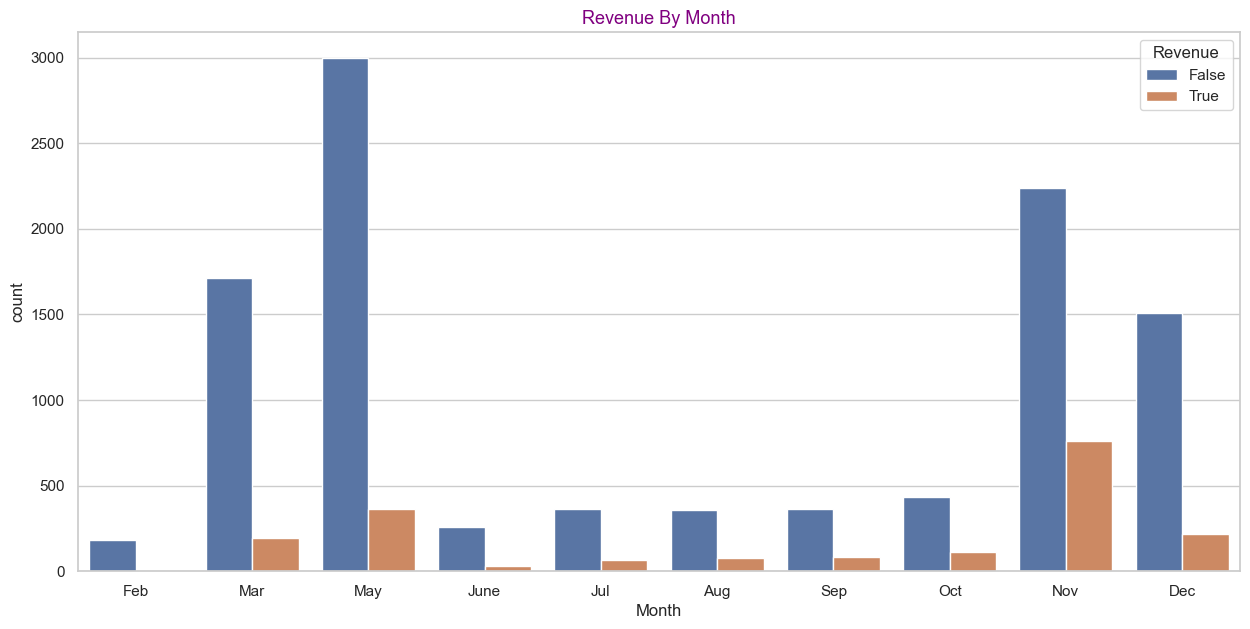

In [136]:
sns.countplot(x='Month', hue = "Revenue", data = df, 
              order = ['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Revenue By Month", color ='purple', fontsize = 13)
plt.show()

Website visits by customers may be high in May, but it is observed from the barplot above that a greater number of purchases were made by customers in the month of November.

### Analysing Revenue Generated By Region
To determin how this variable contributes to sales, we begin by evaluating the relationship between the Revenue and Region features. This might just be reliable in the event of planning marketing campaigns and logistics better.


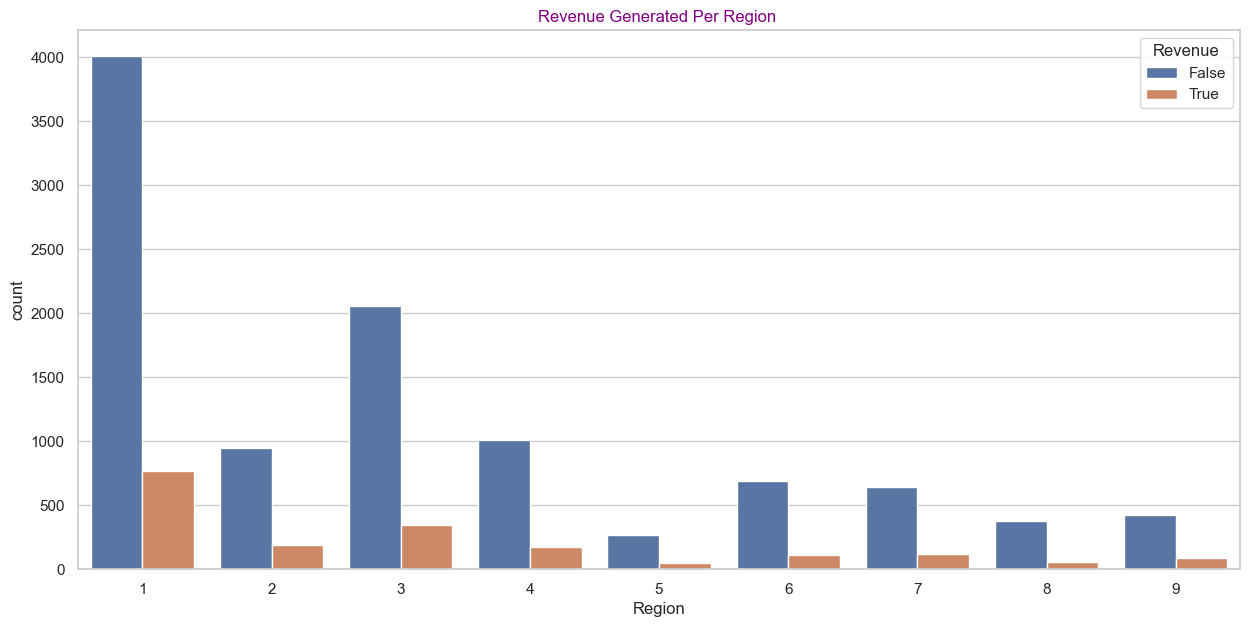

In [137]:
sns.countplot(data = df, x = "Region", hue = "Revenue")
#plt.legend(loc = 'right')
plt.title('Revenue Generated Per Region ', color = 'purple')
plt.show()

Based on the plot shown earlier, we can observe that region 1 has the highest sales, followed by region 3. This data can assist us in improving our marketing and supply chain strategies. For instance, we could suggest constructing a warehouse that caters exclusively to the requirements of region 1. This would help enhance delivery speed and ensure that popular products are always available in sufficient quantity.

### LINEAR RELATIONSHIP

The primary objective of this part is to establish if there is a linear correlation between two columns. For the variables to have a linear relationship, they must meet one of these two conditions: 
* when the value of one variable increases, the value of the other variable also increases, or
* when the value of one variable increases, the value of the other variable decreases.

Here are some variable pairs that we can begin investigating for linear relationships:
- Bounce rate and exit rate
- Page value and bounce rate
- Page value and exit rate
- The influence of administrative page views and administrative page view duration on revenue
- The influence of information page views and information page view duration on revenue.

### Bounce rate and exit rate
The difference between bounce rate and exit rate. The bounce rate is the percentage of visitors who leave our website after visiting only one page, while the exit rate is the percentage of visitors who leave our website after visiting multiple pages. The exit rate can be an indication of pages that need improvement, but the bounce rate is a more critical metric because it shows us where we are losing visitors immediately

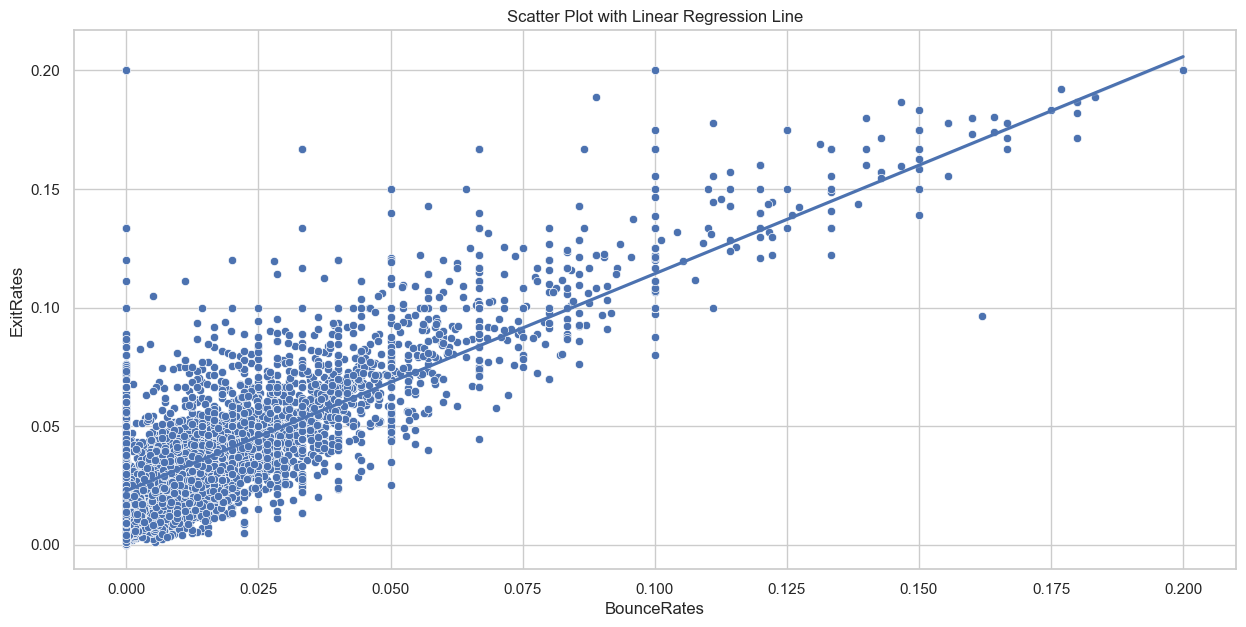

In [138]:

sns.set(style="whitegrid")
ax = sns.scatterplot(x="BounceRates", y="ExitRates", data=df)
ax = sns.regplot(x="BounceRates", y="ExitRates", data=df, scatter=False)
plt.title("Scatter Plot with Linear Regression Line")

# Example of adding annotation to a specific point
plt.annotate("Point A", xy=(0.2, 0.4), xytext=(0.3, 0.6),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Example of adding annotation to a region
plt.annotate("Region 1", xy=(0.4, 0.5), xytext=(0.5, 0.7),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()


In [139]:
#correlation coefficient
correlation_coefficient = df["BounceRates"].corr(df["ExitRates"])
print("Correlation coefficient:", correlation_coefficient)

Correlation coefficient: 0.9130043961815211


Since the correlation coefficient[0.9130043961815211] is close to 1, it suggests that as the "BounceRates" increase, the "ExitRates" also tend to increase. This positive correlation indicates that there is a tendency for higher bounce rates to be associated with higher exit rates.

 If we want to improve the correlation between exit and bounce rates, we need to examine the pages on our website that have high exit and bounce rates, determine why visitors are leaving these pages, and enhance them. This can be done by using engaging content or images to communicate information, making the pages more visually appealing, and improving the overall user experience. We can also add links to related pages on our website to encourage visitors to explore more pages.

### Page value and bounce rate

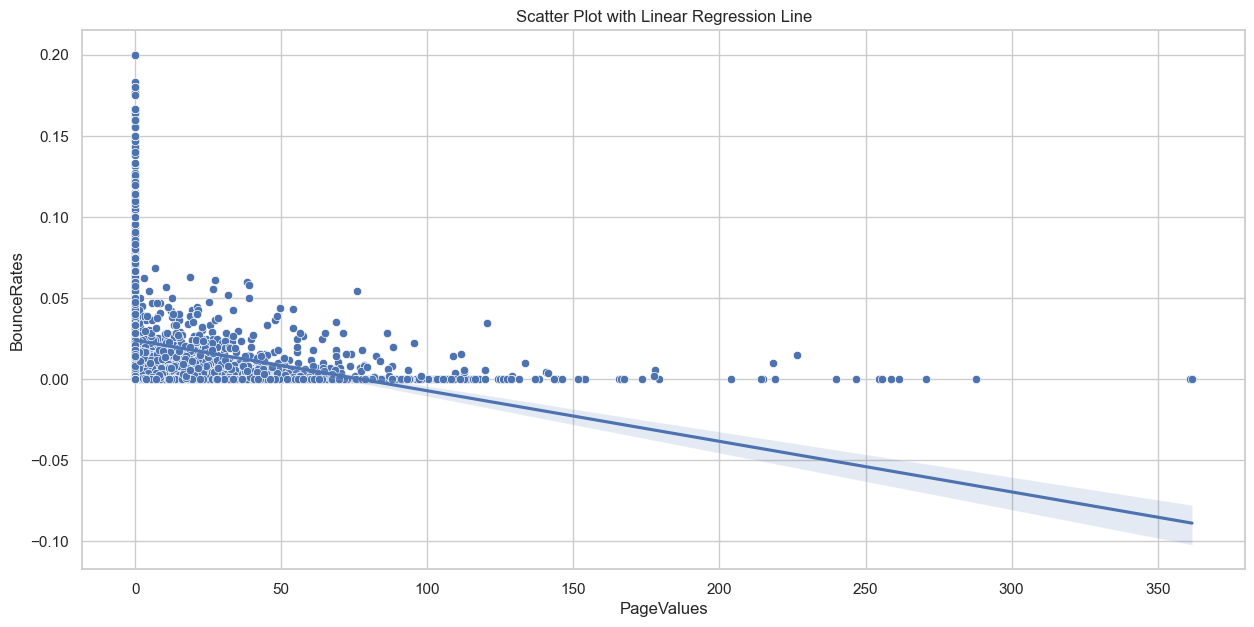

In [140]:
#Scatter Plot with Linear Regression Line
sns.set(style="whitegrid")
ax = sns.scatterplot(x="PageValues", y="BounceRates", data=df)
ax = sns.regplot(x="PageValues", y="BounceRates", data=df, scatter=False)
plt.title("Scatter Plot with Linear Regression Line")
plt.show()

In [141]:
#correlation coefficient
correlation_coefficient = df["PageValues"].corr(df["BounceRates"])
print("Correlation coefficient:", correlation_coefficient)

Correlation coefficient: -0.11938602629479457


Based on the correlation coefficient results provided, which is approximately -0.119, it indicates a weak negative correlation between the "PageValues" and "BounceRates" variables in our dataset.

To reduce the bounce rate and increase the likelihood of a customer making a purchase, we need to enhance the value of our website pages. This can be achieved by using engaging content or images to convey information. As the page value increases, the bounce rate will decrease.

### Page value and exit rate


In [142]:
#correlation coefficient
correlation_coefficient = df["PageValues"].corr(df["ExitRates"])
print("Correlation coefficient:", correlation_coefficient)

Correlation coefficient: -0.174498310001782


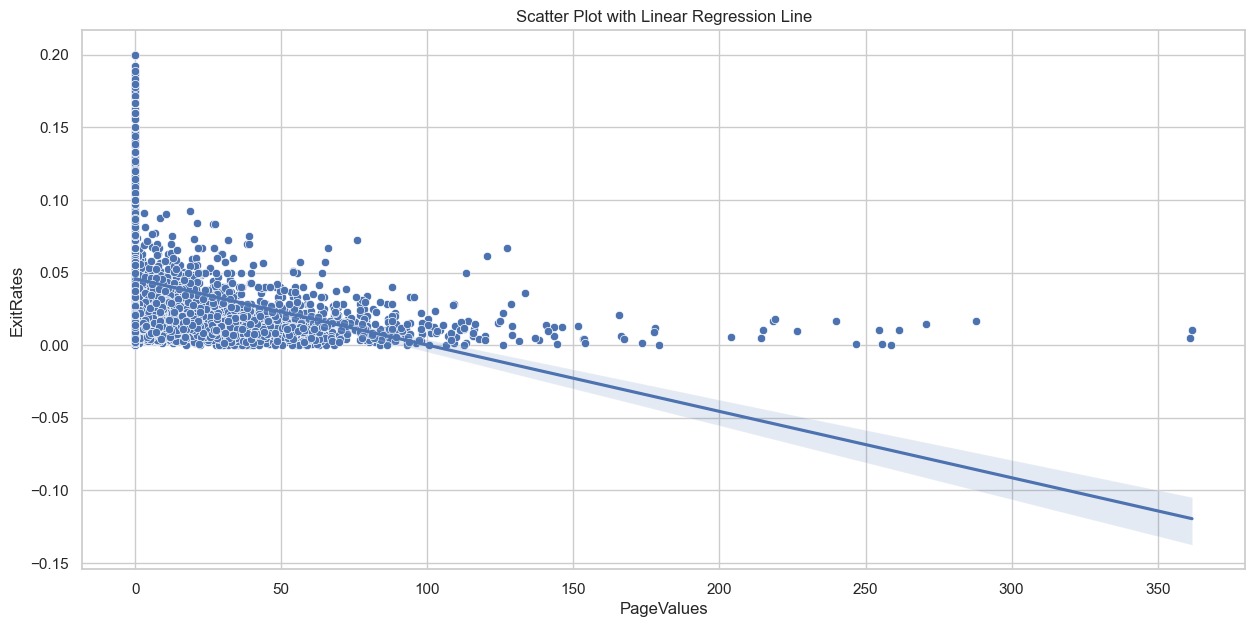

In [143]:

#Scatter Plot with Linear Regression Line
sns.set(style="whitegrid")
ax = sns.scatterplot(x="PageValues", y="ExitRates", data=df)
ax = sns.regplot(x="PageValues", y="ExitRates", data=df, scatter=False)
plt.title("Scatter Plot with Linear Regression Line")
plt.show()

Based on the correlation coefficient calculated in the previous cell, which is approximately -0.174, indicates a weak negative correlation between the "PageValues" and "BounceRates" variables in your dataset.

To create a positive correlation between page value and exit rates, we need to improve the value of our website pages by using engaging content, making the pages more visually appealing, and improving the overall user experience. Adding links to related pages on our website can also encourage visitors to explore more pages.

###  Information page views and information page view duration on revenue.

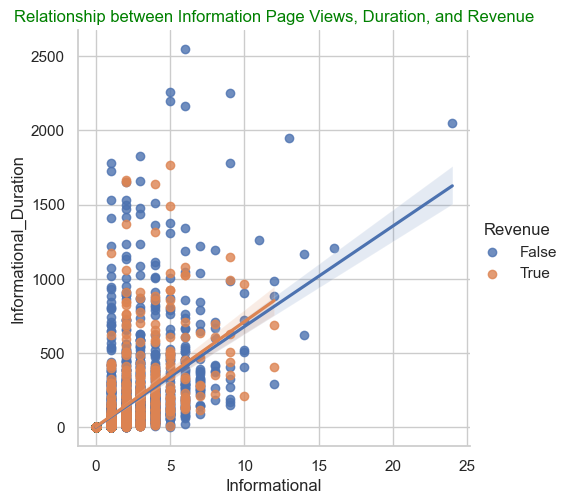

In [144]:
sns.set(style="whitegrid")
ax = sns.lmplot(x="Informational", y="Informational_Duration", hue="Revenue", data=df)
plt.title("Relationship between Information Page Views, Duration, and Revenue", color = 'green')
plt.show()

In [145]:
# Calculate the correlation coefficient of Informational & Informational_Duration
correlation = df["Informational"].corr(df["Informational_Duration"])

print("Correlation coefficient:", correlation)


Correlation coefficient: 0.6189548617814576


The coefficient indicates a strong positive correlation (0.62) where both variables tend to increase together, indicating a significant and robust association between them.

In [146]:
# Calculating the correlation coefficient of Revenue & Informational_Duration
correlation = df["Revenue"].corr(df["Informational_Duration"])

print("Correlation coefficient:", correlation)

Correlation coefficient: 0.07034450234598343


The coefficient suggests a weak positive correlation with a less pronounced association between the variables. The relationship is not strong despite the positive trend.

In [147]:
# Calculating the correlation coefficient of Revenue & Informational
correlation = df["Revenue"].corr(df["Informational"])

print("Correlation coefficient:", correlation)

Correlation coefficient: 0.09520034257205733


The coefficient indicates a weak positive correlation with a less pronounced association between the variables. The positive trend suggests a modest relationship, but it is not strong.

### Administrative page views and administrative page view duration on revenue

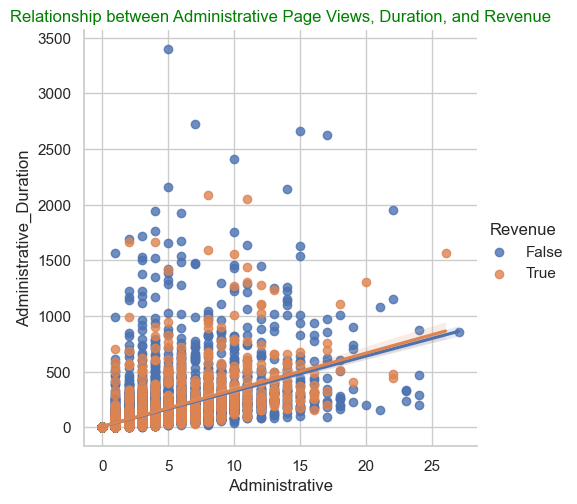

In [148]:
sns.set(style="whitegrid")
ax = sns.lmplot(x="Administrative", y="Administrative_Duration", hue="Revenue", data=df)
plt.title("Relationship between Administrative Page Views, Duration, and Revenue", color = 'green')
plt.show()

In [149]:
# Calculating the correlation coefficient of Administrative & Administrative_Duration
correlation = df["Administrative"].corr(df["Administrative_Duration"])

print("Correlation coefficient:", correlation)


Correlation coefficient: 0.6015833421250224


The value is close to 0.60, suggesting a substantial positive correlation.
As one variable increases, there is a clear tendency for the other variable to increase as well.
The coefficient implies a relatively strong and significant association between the variables.

In [150]:

# Calculate the correlation coefficient of Revenue & Administrative_Duration
correlation = df["Revenue"].corr(df["Administrative_Duration"])

print("Correlation coefficient:", correlation)


Correlation coefficient: 0.09358671905704201


This coefficient also indicates a positive relationship between the variables.
The value is close to 0.094, suggesting a weak positive correlation.
The correlation is weaker compared to the first coefficient, indicating a less pronounced association between the variables.
While there is a positive trend, the relationship is not strong.

In [151]:
# Calculate the correlation coefficient Revenue & Administrative
correlation = df["Revenue"].corr(df["Administrative"])

print("Correlation coefficient:", correlation)


Correlation coefficient: 0.1389170941506722


The value is close to 0.14, suggesting a relatively weak positive correlation.
As one variable increases, there is a tendency for the other variable to increase, but the relationship is not very strong.
The coefficient implies a positive but modest association between the variables.

# Performing Clustering

## K-means Clustering for Informational Duration versus Bounce Rate

This clustering algorithm is empoyed to explore the amount of time that a visitor spends on a website page before leaving(Information duration) and the percentage of visitors who leave a website after visiting only one page (Bounce rate).

In [169]:
# Extract the relevant columns from the DataFrame
x = df[['Informational_Duration', 'BounceRates']]

# Determine the optimal number of clusters using the elbow method
inertia = []
k_values = range(1, 11)  #Running the k-means algorithm for different values of k.
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_) #Appends the inertia value calculated using Kmeans to total cluster sum of squares ,wcss



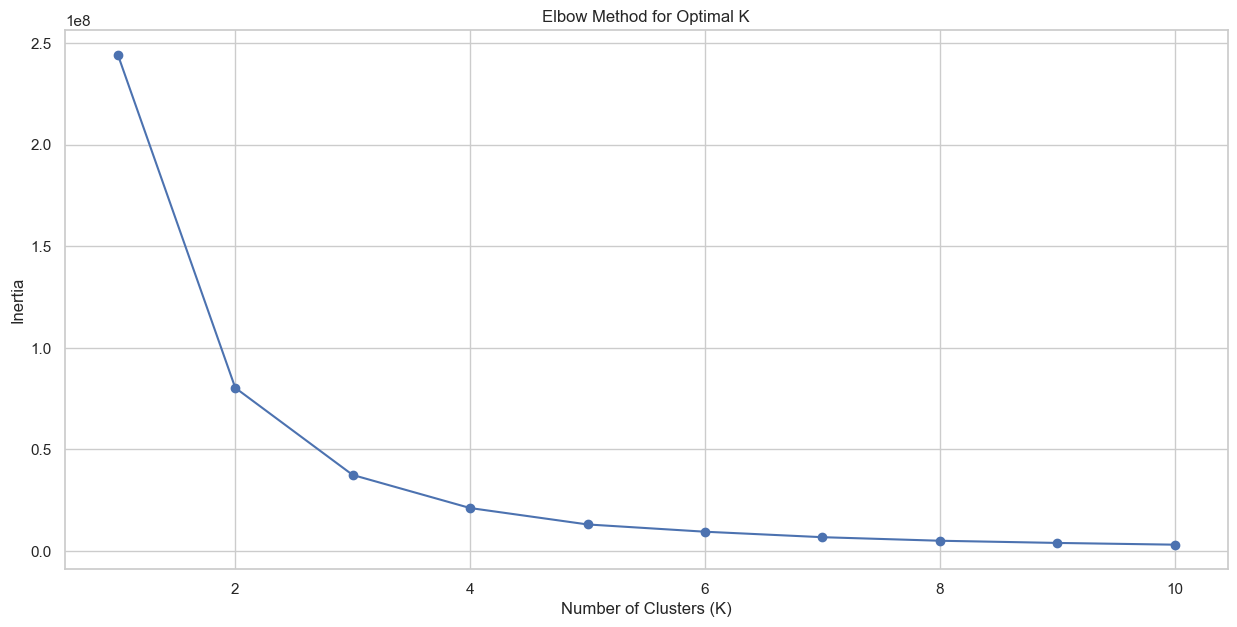

In [170]:
# Plot the inertia values to identify the elbow point and find the value for k
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

From the preceding elbow graph, we can infer that k=2 is the optimum value
for clustering.

In [171]:
#Now, run k-means clustering with k=2:
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(data)

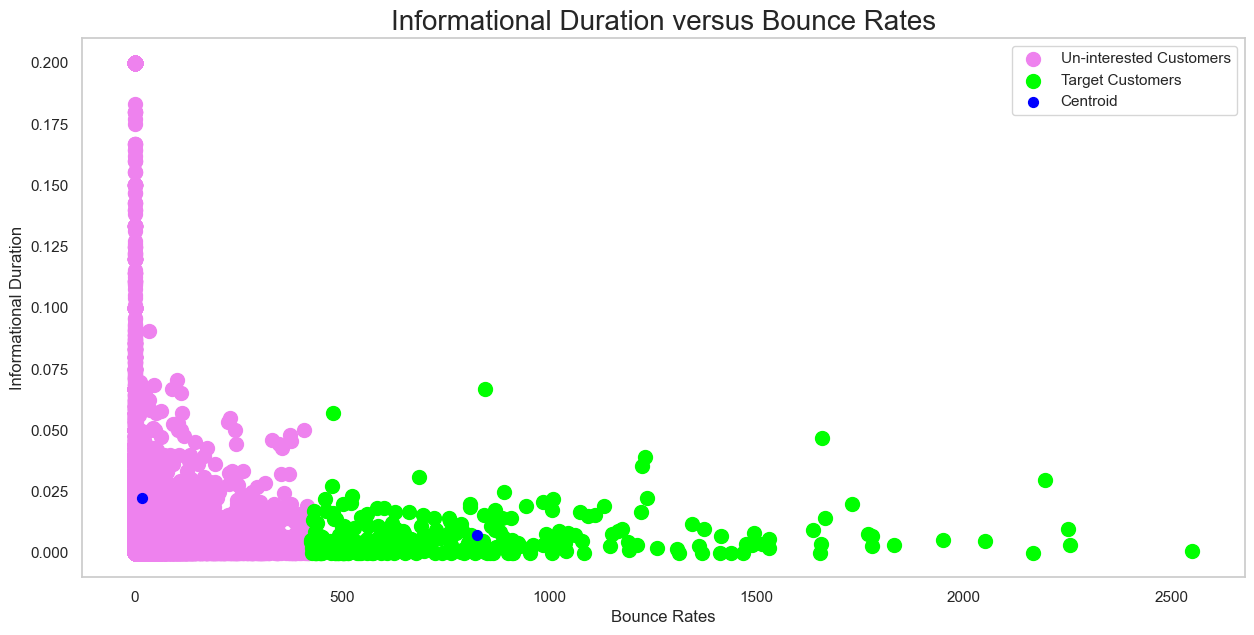

In [172]:
# Assuming `data` is a DataFrame containing the required columns for plotting
x = x.values

# Perform k-means clustering
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x)

# Plot the scatter plot
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100, c='violet', label='Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c='lime', label='Target Customers')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=50, c='blue', label='Centroid')

plt.title('Informational Duration versus Bounce Rates', fontsize=20)
plt.grid()
plt.xlabel('Bounce Rates')
plt.ylabel('Informational Duration')
plt.legend()
plt.show()


As seeen in the plot above, we assign the color violet for uninterested
customers (in which Revenue is False), green for target customers (in which
Revenue is True), and blue for the centroid of the cluster:

In [174]:
# Get the cluster centroids
centroids = km.cluster_centers_

# Print the centroids for each cluster
for i, centroid in enumerate(centroids):
    print(f"Centroid for Cluster {i+1}: {centroid}")


Centroid for Cluster 1: [ 0.02251152 17.68297392]
Centroid for Cluster 2: [7.09239641e-03 8.26329841e+02]


From the results of these centroids, we can say that Cluster 1 has a relatively lower "Informational Duration" (around 17.68) and a slightly higher "Bounce Rates" (around 0.0225). On the other hand, Cluster 2 has a significantly higher "Informational Duration" (around 826.33) and a lower "Bounce Rates" (around 0.0071).

Based on the clustering results and the centroids obtained, here are some recommendations:

    1. Target Engagement: Cluster 2, characterized by a higher "Informational Duration" and lower "Bounce Rates," represents a group of customers who are more engaged with the informational content on your website. You can focus your marketing efforts on this cluster by providing them with more relevant and detailed information, personalized recommendations, and targeted offers to enhance their experience and increase conversions.


    2. Improve Engagement for Cluster 1: Cluster 1, with lower "Informational Duration" and slightly higher "Bounce Rates," may indicate a group of customers who are less engaged or have a higher tendency to leave the website without exploring further. To improve engagement for this cluster, you can consider optimizing the design and layout of the informational pages, providing clear and concise information, enhancing the user experience, and offering incentives or discounts to encourage them to explore more content.


    3. Segment Marketing Strategies: The differences in "Informational Duration" and "Bounce Rates" between the two clusters suggest distinct customer behaviors. Use this segmentation to tailor your marketing strategies accordingly. For Cluster 2, focus on nurturing their engagement and driving conversions through personalized and targeted campaigns. For Cluster 1, concentrate on capturing their attention and guiding them towards relevant content or products through clear messaging and intuitive navigation.


    4. Content Optimization: Analyze the content on your website, particularly the informational pages, to ensure it is valuable, engaging, and meets the needs of your target audience. Use the insights from the clustering results to identify any gaps or areas of improvement in the content. Consider incorporating interactive elements, visuals, and clear calls-to-action to enhance user engagement and reduce bounce rates.


    5. Continuous Monitoring and Refinement: Keep monitoring the engagement metrics, such as "Informational Duration" and "Bounce Rates," for different customer segments over time. Refine your marketing strategies based on the evolving behaviors and preferences of your customers. Regularly review the clustering results to identify any shifts or changes in customer segments and adapt your approaches accordingly.


## K-means Clustering for Informational Duration versus Exit Rate

In [175]:
# Extracting the relevant columns from the DataFrame
x = df.iloc[:, [4, 7]].values

In [176]:
# Running the k-means algorithm for different values of k. km is the k-means clustering
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', \
                max_iter = 300, n_init = 10, \
                random_state = 0, algorithm = 'elkan', tol = 0.001)

In [177]:
#. Fit the k-means algorithm to the x variable we defined in the preceding cells
km.fit(x)
labels = km.labels_
    

In [178]:
#Appends the inertia value calculated using Kmeans to total cluster sum of squares ,wcss
wcss.append(km.inertia_) 

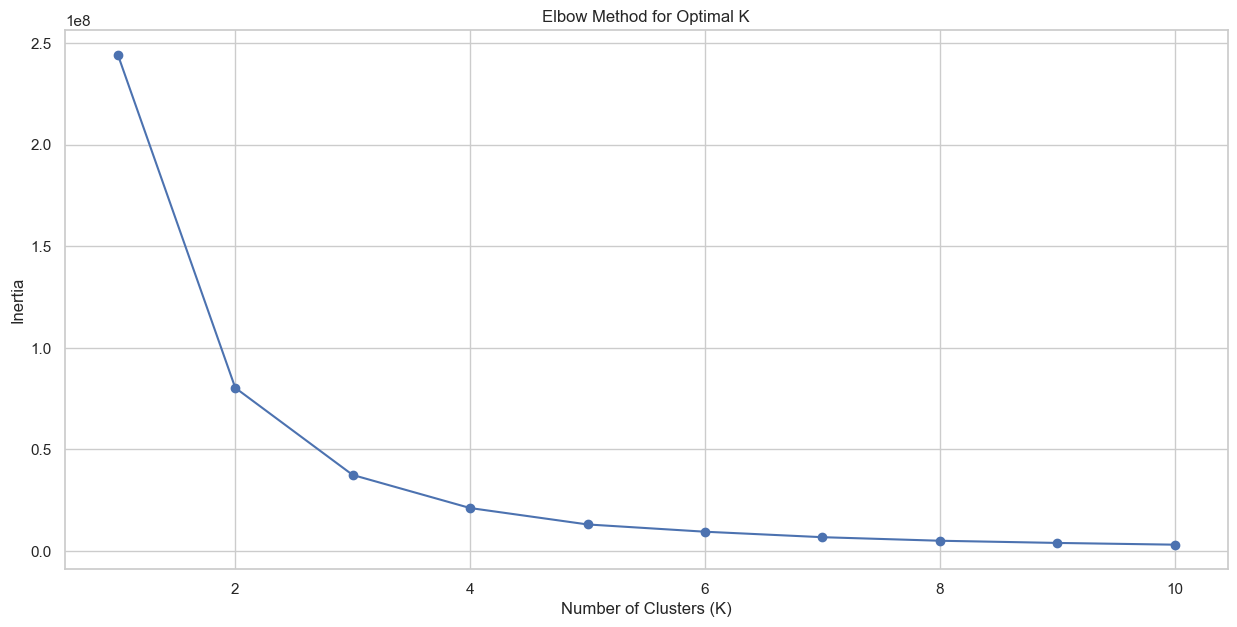

In [179]:
# Plot the inertia values to identify the elbow point and find the value for k
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [180]:
#Now, run k-means clustering with k=2:
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

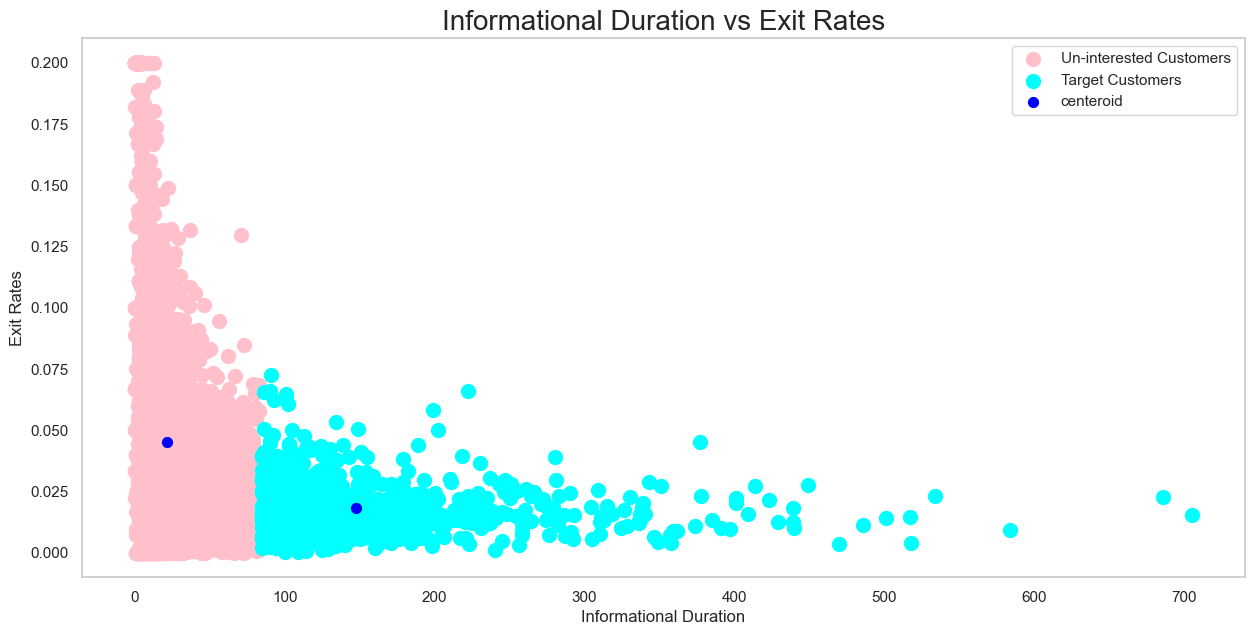

In [183]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'blue' , label = 'centeroid')
plt.title('Informational Duration vs Exit Rates', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Exit Rates')
plt.legend()
plt.show()

In [182]:
# Get the cluster centroids
centroids = km.cluster_centers_

# Print the centroids for each cluster
for i, centroid in enumerate(centroids):
    print(f"Centroid for Cluster {i+1}: {centroid}")


Centroid for Cluster 1: [21.66649035  0.04521417]
Centroid for Cluster 2: [1.47402229e+02 1.84632680e-02]


the centroid for Cluster 1 has a Bounce Rate of approximately 21.67 and an Informational Duration of approximately 0.045. This means that, on average, the data points within Cluster 1 tend to have a lower Bounce Rate and a slightly higher Informational Duration compared to the data points in Cluster 2.

Similarly, the centroid for Cluster 2 has a higher Bounce Rate of approximately 147.40 and a lower Informational Duration of approximately 0.018. This suggests that, on average, the data points within Cluster 2 tend to have a higher Bounce Rate and a shorter Informational Duration compared to the data points in Cluster 1

To address Cluster 2, which consists of customers with a higher Bounce Rate and shorter Informational Duration:

    -Improve website usability and user experience.
    -Enhance the relevance and quality of the website's content.
    -Optimize the page load time to ensure faster loading.
    -Personalize the user experience based on their preferences.
    -Conduct A/B testing and gather user feedback for insights.
    -Implement targeted marketing campaigns to engage Cluster 2 customers.

## K-means Clustering  On Administrative Duration and Bounce Rate.

In [190]:
#Select Administrative Duration and Bounce Rate columns and assign to a variable, 
x = df.iloc[:, [1, 6]].values
wcss = []
x.shape

(12330, 2)

In [191]:
#initializing the k-means algorithm
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', \
                max_iter = 300, n_init = 10, \
                random_state = 0, algorithm = 'elkan', \
                tol = 0.001)

In [192]:
#for diff values of k, we compute the k-means inertia and store it in a variable, wcss
km.fit(x)
labels = km.labels_
wcss.append(km.inertia_)

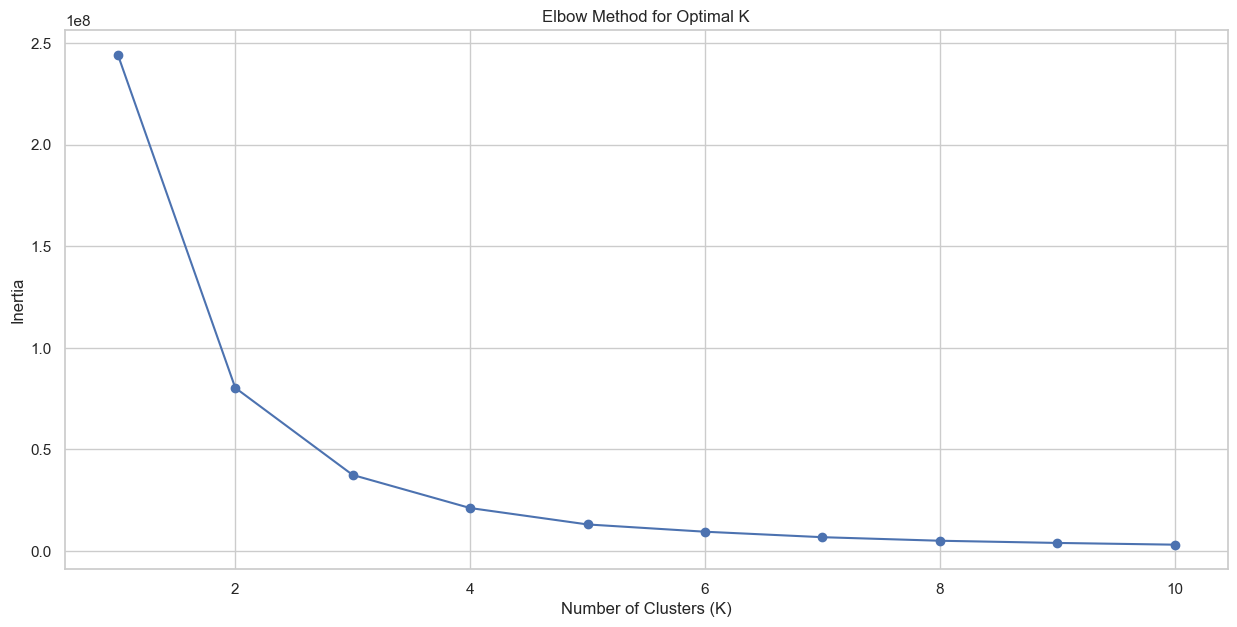

In [193]:
# Plot the inertia values to identify the elbow point and find the value for k
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [194]:
#Now, run k-means clustering with k=2:
km = KMeans(n_clusters = 2, init = 'k-means++', \
            max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

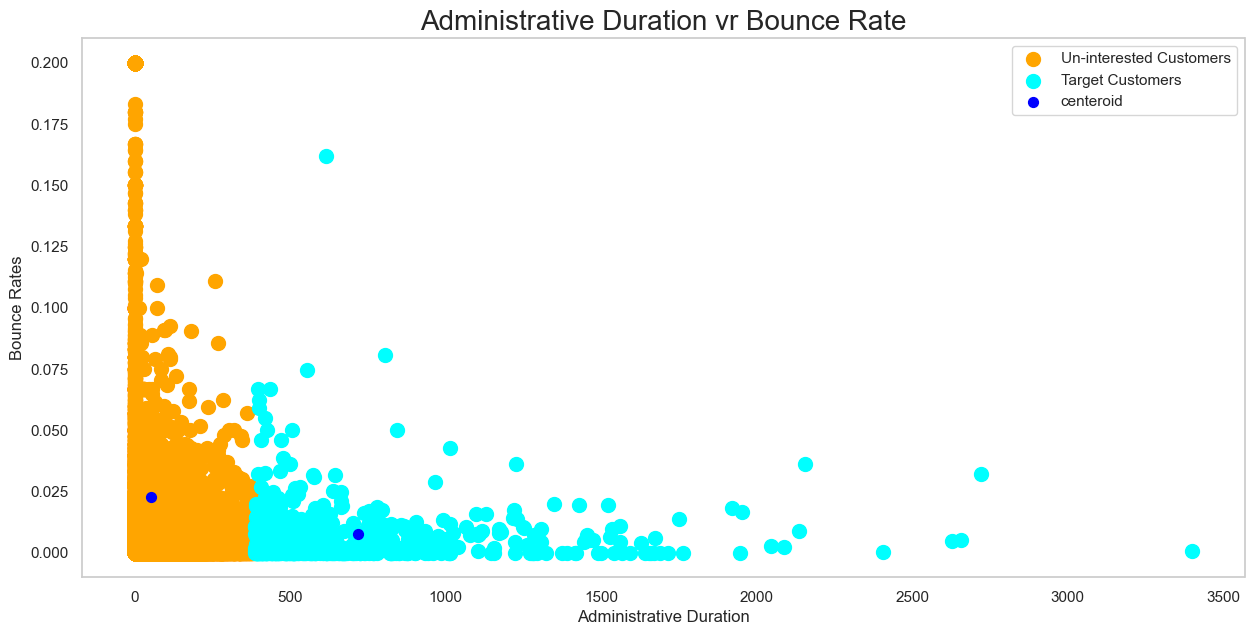

In [200]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, \
            c = 'orange', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, \
            c = 'cyan', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], \
            s = 50, c = 'blue' , label = 'centeroid')
plt.title('Administrative Duration vr Bounce Rate', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

In [198]:
# Get the cluster centroids
centroids = km.cluster_centers_

# Print the centroids for each cluster
for i, centroid in enumerate(centroids):
    print(f"Centroid for Cluster {i+1}: {centroid}")


Centroid for Cluster 1: [5.24199454e+01 2.28418466e-02]
Centroid for Cluster 2: [7.16851713e+02 7.62316095e-03]


Cluster 1 centroid: [52.4199454, 0.0228418466]

The average "Administrative Duration" of approximately 52.42 suggests that customers in Cluster 1 spend, on average, a moderate amount of time on administrative tasks.
The average "Bounce Rates" of around 0.0228 or 2.28% indicates that customers in Cluster 1 have a relatively low bounce rate. This suggests that they are more engaged with the website and tend to navigate beyond the landing page, exploring additional pages or taking desired actions.

Cluster 2 centroid: [716.851713, 0.00762316095]

The average "Administrative Duration" of approximately 716.85 indicates that customers in Cluster 2 spend a significantly longer time on administrative tasks compared to Cluster 1. This suggests that they may require more interaction or engagement with administrative features or content.
The average "Bounce Rates" of around 0.0076 or 0.76% suggests that customers in Cluster 2 have a relatively low bounce rate as well, indicating their engagement with the website and a higher likelihood of navigating beyond the landing page.

## Conclusion

In this project, our focus was on analyzing an online shopping dataset to gain insights into customer behavior on the website. We examined several factors, including conversion rate and total revenue generated. We conducted both univariate and bivariate analyses, considering various features of the dataset such as pageview duration, visitor types, traffic sources, and browser usage. To determine the optimal number of clusters, we implemented the K-means algorithm and utilized the elbow method. The resulting scatterplots based on the chosen cluster value provided valuable information to guide our future decision-making and planning